# Bank Customer Churn Prediction using ANN

This project implements an Artificial Neural Network (ANN) using TensorFlow/Keras to predict customer churn in a bank dataset. The goal is to classify whether a customer is likely to leave the bank based on their profile and account information.

### Key Highlights:
- Dataset: Bank Customer Churn Dataset from Kaggle (https://www.kaggle.com/datasets/aakash50897/churn-modellingcsv?resource=download)
- Model: Multi-layer ANN (feedforward neural network)
- Techniques:
  - Categorical Encoding
  - Feature Scaling
  - Train-Test Split
  - EarlyStopping
- Evaluation Metrics:
  - Accuracy
  - Confusion Matrix

### Algorithm Used:
- **Artificial Neural Network (ANN)**
  - Optimizer: Adam
  - Loss Function: Binary Crossentropy
  - Activation: ReLU and Sigmoid


In [1]:
# # For GPU users
# !pip install tensorflow[and-cuda]

# # For CPU users
# !pip install tensorflow

### 1. Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
print("Tensorflow Version:",tf.__version__)

Tensorflow Version: 2.13.1


### 2. Load and Inspect the Data


In [4]:
df = pd.read_csv("./../Dataset/Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
print("Dataset shape:", df.shape)

Dataset shape: (10000, 14)


In [7]:
print("Data types and nulls:")
df.info()

Data types and nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Check statistics and duplicates
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [10]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


### 3. Feature Selection and Target Separation

In [11]:
# Select independent features (columns 3 to 12)
X = df.iloc[:,3:13]

In [12]:
# Select Target variable
y = df.iloc[:,13]

In [13]:
print("\nFeatures sample:")
X.head()


Features sample:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
print("\nTarget sample:")
print(y.head())


Target sample:
0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


### 4. Encoding Categorical Features (One-Hot)

In [15]:
# One-hot encode 'Geography' and 'Gender', drop one category to avoid dummy variable trap

geography_encoded = pd.get_dummies(X['Geography'], drop_first=True)
gender_encoded = pd.get_dummies(X['Gender'], drop_first=True)

In [16]:
# Drop original categorical columns
X.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [17]:
# Concatenate encoded columns
X = pd.concat([X, geography_encoded, gender_encoded], axis=1).astype(int)

In [18]:
print("\nEncoded feature sample:")
X.head()


Encoded feature sample:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0


### 5. Train-Test Split and Feature Scaling

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# Scale features for better ANN performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
print("\nTraining features shape:", X_train.shape)
print("Test features shape:", X_test.shape)


Training features shape: (8000, 11)
Test features shape: (2000, 11)


### 6. Build the ANN Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
model = Sequential()

In [29]:
# Input layer + first hidden layer
model.add(Dense(units=11, activation='relu', input_dim=X_train.shape[1]))

In [30]:
# Second hidden layer
model.add(Dense(units=7, activation='relu'))

In [31]:
# Output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))

In [32]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 7)                 84        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 356 (1.39 KB)
Trainable params: 356 (1.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 7. Compile the ANN Model

In [33]:
# Use Adam optimizer with learning rate control
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [34]:
# Compile model with binary classification loss
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 8. Train the Model with Early Stopping


🔁 What Is EarlyStopping?

During training, sometimes a model will start to overfit — its accuracy on training data keeps improving, but its accuracy (or loss) on validation data starts to get worse.

➡️ EarlyStopping watches a chosen metric (like 'val_loss') and automatically stops training when that metric stops improving.

| Parameter                   | What It Means                                                                                    |
| --------------------------- | ------------------------------------------------------------------------------------------------ |
| `monitor='val_loss'`        | 🔍 Tells Keras to watch the validation loss (you could also use `'val_accuracy'`, etc.)          |
| `patience=20`               | ⏳ Wait **20 epochs** after the last improvement before stopping training                         |
| `min_delta=0.0001`          | 🔼 A change smaller than this is **not considered an improvement**                               |
| `verbose=1`                 | 📢 Prints a message when early stopping happens                                                  |
| `restore_best_weights=True` | ✅ After stopping, it **restores the model weights from the epoch with the best validation loss** |


In [36]:
# Define early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

In [37]:
# Fit the model
history = model.fit(X_train, y_train,
                    validation_split=0.33,
                    batch_size=10,
                    epochs=100,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.4230 - accuracy: 0.8209 - val_loss: 0.3902 - val_accuracy: 0.8304
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3636 - accuracy: 0.8513 - val_loss: 0.4010 - val_accuracy: 0.8402
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3498 - accuracy: 0.8593 - val_loss: 0.3825 - val_accuracy: 0.8459
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8580 - val_loss: 0.3609 - val_accuracy: 0.8504
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3429 - accuracy: 0.8608 - val_loss: 0.3659 - val_accuracy: 0.8497
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3414 - accuracy: 0.8627 - val_loss: 0.3600 - val_accuracy: 0.8501
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8649 - val_loss: 0.3566 - val_accuracy: 0.8523

### 9. Plot Accuracy and Loss

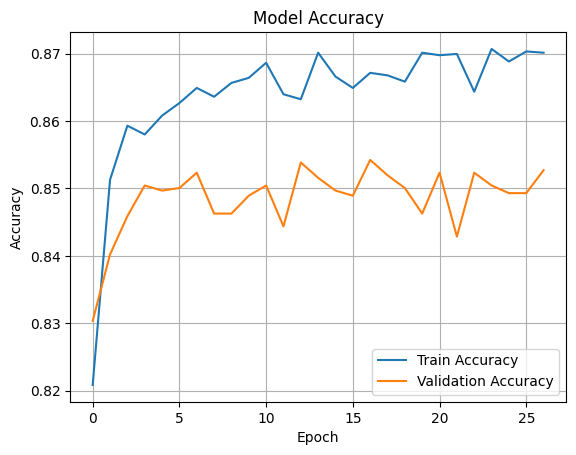

In [38]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

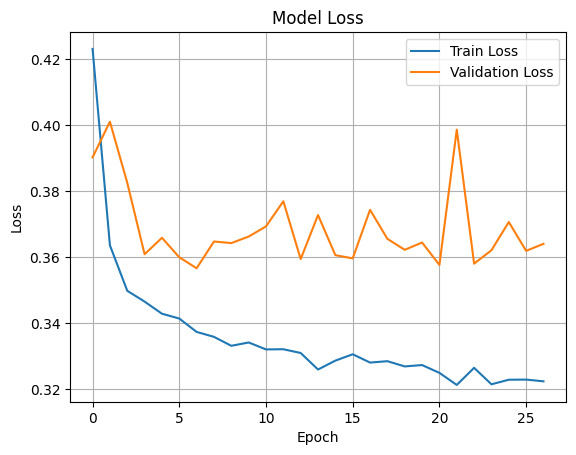

In [39]:
# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### 10. Evaluate on Test Dataset

In [40]:
# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

63/63 [==============================] - 0s 964us/step


In [57]:
print(y_pred[588])

[1]


In [58]:
# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy:", round(test_accuracy, 4))


Test Accuracy: 0.8635


In [59]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1536   71]
 [ 202  191]]


### 11. Save the Trained Model

In [60]:
# Save entire model to a file
model.save("churn_model.h5")  # HDF5 format

d:\AIML And DSA\AI Projects\Deep Learning\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 12. Load the Model Later (in another script or app)

In [61]:
from tensorflow.keras.models import load_model

In [62]:
# Load the Save Model
loaded_model = load_model("churn_model.h5")

### 13. Save and Load the Scaler (Optional but Recommended) 

In [ ]:
import joblib

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# # Load the scaler
# scaler = joblib.load("scaler.pkl")


### 14. Input-Based Prediction System

In [ ]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Load saved model and scaler
model = load_model("churn_model.h5")
scaler = joblib.load("scaler.pkl")

print("🔮 Bank Customer Churn Prediction System 🔮")
print("Please provide the following details:")

# Ask user for input values
credit_score = int(input("1. Credit Score (e.g. 600): "))
geography = input("2. Geography (France, Germany, Spain): ").strip().capitalize()
gender = input("3. Gender (Male/Female): ").strip().capitalize()
age = int(input("4. Age: "))
tenure = int(input("5. Tenure (Years with bank): "))
balance = float(input("6. Account Balance: "))
num_of_products = int(input("7. Number of Products (e.g. 1 or 2): "))
has_credit_card = int(input("8. Has Credit Card? (1 = Yes, 0 = No): "))
is_active_member = int(input("9. Is Active Member? (1 = Yes, 0 = No): "))
estimated_salary = float(input("10. Estimated Salary: "))

# Geography Encoding (France is baseline)
geography_germany = 1 if geography == "Germany" else 0
geography_spain = 1 if geography == "Spain" else 0

# Gender Encoding (Male = 1, Female = 0)
gender_male = 1 if gender == "Male" else 0

# Create input vector
input_data = np.array([[credit_score, age, tenure, balance, num_of_products,
                        has_credit_card, is_active_member, estimated_salary,
                        geography_germany, geography_spain, gender_male]])

# Scale input
input_scaled = scaler.transform(input_data)

# Predict
churn_prob = model.predict(input_scaled)[0][0]
churn = churn_prob > 0.5

# Output result
print("\n🧾 Prediction Results:")
print(f"Churn Probability: {churn_prob:.2f}")
print("Prediction: 🚫 Customer Will Churn" if churn else "Prediction: ✅ Customer Will Stay")

🔮 Bank Customer Churn Prediction System 🔮
Please provide the following details:
1/1 [==============================] - 0s 45ms/step

🧾 Prediction Results:
Churn Probability: 0.14
Prediction: ✅ Customer Will Stay


d:\AIML And DSA\AI Projects\Deep Learning\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Notes:

#### Interview Question:

#### Q.1 for which all **algotithms feature scaling is required?**

- Any Algorithm that is distance based that need feature scaling.
- whenever gardient diescent or optimizer is required then feature scaling is required

Feature scaling is **not always required**, but for many machine learning algorithms, it is **crucial for performance** and **faster convergence**. Here's a breakdown:

---

##### ✅ **Algorithms that Require Feature Scaling**

These algorithms are **distance-based** or **gradient-based**, so they are sensitive to the magnitude of features.

| Algorithm                              | Reason for Scaling                                                                  |
| -------------------------------------- | ----------------------------------------------------------------------------------- |
| **K-Nearest Neighbors (KNN)**          | Uses Euclidean distance → features with larger ranges dominate the distance metric. |
| **Support Vector Machines (SVM)**      | Uses dot products and distances to find the optimal hyperplane.                     |
| **Logistic Regression**                | Gradient descent converges faster with scaled features.                             |
| **Linear Regression (with GD)**        | Scaling helps gradient descent perform efficiently.                                 |
| **Principal Component Analysis (PCA)** | Sensitive to variances of input features.                                           |
| **K-Means Clustering**                 | Uses Euclidean distance for assigning clusters.                                     |
| **Neural Networks / Deep Learning**    | Better convergence and weight initialization when features are scaled.              |

---

##### ❌ **Algorithms that Do NOT Require Feature Scaling**

These algorithms are **tree-based** or use **splits** that are **not distance-based**.

| Algorithm                                           | Reason Scaling is Not Required                            |
| --------------------------------------------------- | --------------------------------------------------------- |
| **Decision Trees**                                  | Based on feature thresholds; scale doesn't matter.        |
| **Random Forests**                                  | Ensemble of decision trees → unaffected by feature scale. |
| **Gradient Boosting (XGBoost, LightGBM, CatBoost)** | Also tree-based and scale-invariant.                      |
| **Naive Bayes**                                     | Uses probabilities and likelihoods → unaffected by scale. |
| **Rule-based Models**                               | Scale has no effect on logical rules.                     |

---

##### 🧠 **Summary Table**

| Algorithm              | Scaling Needed? |
| ---------------------- | --------------- |
| KNN                    | ✅ Yes           |
| SVM                    | ✅ Yes           |
| Logistic Regression    | ✅ Yes           |
| Linear Regression (GD) | ✅ Yes           |
| Neural Networks (ANN)  | ✅ Yes           |
| PCA / LDA              | ✅ Yes           |
| K-Means                | ✅ Yes           |
| Decision Trees         | ❌ No            |
| Random Forests         | ❌ No            |
| XGBoost, LightGBM      | ❌ No            |
| Naive Bayes            | ❌ No            |

---

##### 🔧 Common Scaling Techniques

* **StandardScaler** (Z-score): `(x - mean) / std`
* **MinMaxScaler**: Scales to `[0, 1]`
* **RobustScaler**: Uses median and IQR (for outliers)
* **Normalizer**: Scales rows to unit norm (mainly for text or sparse vectors)


####  Q.2  What about **deep learning** algorithms like ANN,CNN,RNN,LSTM,GRU,BERT,T5,encoder decoder, transformer architecture? this algorithms require Feature Scaling?

In **deep learning**, feature scaling is still **important**, but how and **where** it's applied depends on:

* The type of **input data** (numerical, image, text),
* The **architecture** (ANN, CNN, RNN, Transformer),
* Whether you're using **pre-trained models** (like BERT/T5), or training from scratch.

---

##### ✅ Feature Scaling in Deep Learning Algorithms

| Algorithm / Architecture      | Is Feature Scaling Needed? | How and Why?                                                                                              |
| ----------------------------- | -------------------------- | --------------------------------------------------------------------------------------------------------- |
| **ANN (Dense / MLP)**         | ✅ Yes                      | Input features should be scaled (e.g., `StandardScaler`, `MinMaxScaler`) to help weights converge faster. |
| **CNN (Convolutional)**       | ✅ Yes                      | Image pixel values are usually scaled to \[0, 1] or \[-1, 1] — crucial for stable training.               |
| **RNN / LSTM / GRU**          | ✅ Yes                      | Sequential numerical data (e.g., time series) should be scaled to ensure gradients are stable.            |
| **Encoder-Decoder**           | ✅ Yes (if numeric)         | Scaling needed for numerical inputs; for text (tokenized), use embeddings.                                |
| **Transformer (Generic)**     | ✅ Yes (if numeric)         | Transformers need scaled inputs unless using embeddings (e.g., in NLP).                                   |
| **BERT / T5 / GPT**           | ❌ No (handled internally)  | Pre-trained NLP models use token embeddings (no manual scaling needed).                                   |
| **Vision Transformers (ViT)** | ✅ Yes                      | Image inputs are normalized, often using pretrained model-specific mean/std.                              |

---

##### 🔍 Details by Input Type

##### 📊 **Numerical Data (Tabular)**

* Scale features using `StandardScaler` or `MinMaxScaler`.
* Required for **ANN**, **RNN**, **LSTM**, **GRU**.

##### 🖼️ **Image Data**

* Use:

  * `x/255.0` for pixel scaling to `[0,1]`
  * Or mean/std normalization (e.g., ImageNet norms: `mean=[0.485, 0.456, 0.406]`)
* Applies to **CNN**, **ViT**, **Autoencoders for image**.

##### 📝 **Text Data**

* No manual feature scaling.
* Use tokenizers + embeddings (BERT, T5, GPT, etc.).
* Scaling is handled via **embedding layers** or **pretrained token embeddings**.

---

##### 🔧 Examples

##### ANN for Tabular Data

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feed X_scaled into your ANN
```

---

##### CNN for Image Data

```python
# Normalize pixels
X = X / 255.0
```

Or using PyTorch transforms:

```python
transforms.Normalize(mean=[0.485, 0.456, 0.406],
                     std=[0.229, 0.224, 0.225])
```

---

##### RNN/LSTM for Time Series

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(time_series)
```

---

##### Transformers with Pretrained Models (e.g., BERT)

```python
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokens = tokenizer("example sentence", return_tensors="pt")
# No manual scaling — embeddings take care of it
```

---

##### ✅ Summary

| Algorithm / Use Case                 | Manual Feature Scaling Needed?    |
| ------------------------------------ | --------------------------------- |
| ANN (tabular)                        | ✅ Yes                             |
| CNN (image)                          | ✅ Yes                             |
| RNN / LSTM / GRU (sequence)          | ✅ Yes                             |
| Transformer (numeric)                | ✅ Yes                             |
| BERT / T5 / GPT (text)               | ❌ No (use tokenizer + embeddings) |
| Pretrained models (e.g. HuggingFace) | ❌ No                              |



#### Q.3 whats the Difference Between **fit_transform** and **transform**?

##### ✅ `fit_transform()`

##### 🔹 Definition:

> `fit_transform()` is used to **learn from the training data** (e.g., calculate mean & std or min & max) **and then apply** the transformation to the same data.

##### 💡 Example:

```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
```

* Learns mean and standard deviation from `X_train`
* Transforms `X_train` to have mean = 0 and std = 1

---

##### ✅ `transform()`

##### 🔹 Definition:

> `transform()` is used to **apply the same transformation** (using already learned values from training data) to **new or test data**.

##### 💡 Example:

```python
X_test_scaled = scaler.transform(X_test)
```

* Does **not** learn again
* Just uses the training data's mean/std to scale `X_test`

---

##### 🎤 Interview-Friendly Summary:

> "`fit_transform()` is used on training data to **learn** and **scale** it.
> `transform()` is used on test data to **apply the same scaling**, ensuring no data leakage."



##### 🎯 You want to understand:

* What does `fit_transform()` do?
* What does `transform()` do?
* What’s the difference between `StandardScaler` and `MinMaxScaler`?

Let’s break it down like a story.

---

##### 🧠 Think of it like this:

You're the **chef**, and your data is a **basket of fruits (numbers)**.
Before serving, you want to **make all fruits the same size** so the machine can "eat" them easily (this is called *scaling*).

---

##### ✅ You have 4 training samples (fruits):

```python
X_train = [[1], [2], [3], [4]]
```

That’s like 4 students who studied for 1, 2, 3, and 4 hours.

---

##### ✅ You also have 2 test samples:

```python
X_test = [[5], [1.5]]
```

They studied for 5 and 1.5 hours.

---

---

##### 🔢 Example 1: Using **StandardScaler**

##### 🎯 Goal: Make data have **mean = 0** and **standard deviation = 1**

##### ▶️ Step 1: Use `fit_transform()` on training data

```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform([[1], [2], [3], [4]])
```

📦 What happens?

1. It **calculates mean = 2.5**, std = 1.12
2. It transforms data like this:

$$
z = \frac{x - \text{mean}}{\text{std}} = \frac{x - 2.5}{1.12}
$$

| Original | Scaled (z)             |
| -------- | ---------------------- |
| 1        | (1 - 2.5)/1.12 ≈ -1.33 |
| 2        | (2 - 2.5)/1.12 ≈ -0.44 |
| 3        | (3 - 2.5)/1.12 ≈ 0.44  |
| 4        | (4 - 2.5)/1.12 ≈ 1.33  |

---

##### ▶️ Step 2: Now use `transform()` on test data

```python
X_test_scaled = scaler.transform([[5], [1.5]])
```

Now it uses **same mean (2.5)** and **std (1.12)** from training, and transforms:

| Original | Scaled                   |
| -------- | ------------------------ |
| 5        | (5 - 2.5)/1.12 ≈ 2.22    |
| 1.5      | (1.5 - 2.5)/1.12 ≈ -0.89 |

✅ You didn’t fit again — just transformed using training data's "rulebook".

---

##### 🔢 Example 2: Using **MinMaxScaler**

##### 🎯 Goal: Scale all values between **0 and 1**

##### ▶️ Step 1: Use `fit_transform()` on training data

```python
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform([[1], [2], [3], [4]])
```

1. It finds **min = 1** and **max = 4**
2. Then transforms like this:

$$
z = \frac{x - \text{min}}{\text{max - min}} = \frac{x - 1}{3}
$$

| Original | Scaled |
| -------- | ------ |
| 1        | 0.0    |
| 2        | 0.33   |
| 3        | 0.66   |
| 4        | 1.0    |

---

##### ▶️ Step 2: `transform()` on test data:

```python
X_test_scaled = scaler.transform([[5], [1.5]])
```

Using the **same min and max (1 and 4)**:

| Original | Scaled             |
| -------- | ------------------ |
| 5        | (5 - 1)/3 = 1.33   |
| 1.5      | (1.5 - 1)/3 = 0.17 |

✅ Again: No new fitting. Only transformation.

---

#### 🧠 Summary in Simple Words

| Step                  | `fit_transform()`                                       | `transform()`                            |
| --------------------- | ------------------------------------------------------- | ---------------------------------------- |
| What it does          | Learns (mean/std or min/max) **+** scales training data | Uses learned info to scale new/test data |
| Use it on             | **Training data only**                                  | **Test/Validation data only**            |
| StandardScaler result | Mean = 0, Std = 1                                       | Same scale applied                       |
| MinMaxScaler result   | Data between 0 and 1                                    | Same scale applied                       |



### Q.4 Does using the same transformation leak test data? if not then how?

👉 **No — using the same transformation (i.e., `transform()` on test data)** **does *not* leak test data.**

---

##### ✅ Here's Why:

##### 🔹 When you use:

```python
scaler.fit_transform(X_train)
```

You're telling the scaler:

> "Learn from **training data only**."

It calculates:

* `mean`, `std` (for `StandardScaler`)
* or `min`, `max` (for `MinMaxScaler`)

---

##### 🔹 Then you use:

```python
scaler.transform(X_test)
```

This says:

> "Now use the same rules (mean/std or min/max) you learned from training data, and apply them to test data."

✔️ The scaler **does NOT look at or learn from the test data** — it just applies the formula.

---

##### 🧠 Why This Avoids Data Leakage

* You only use **information from training data** to preprocess everything.
* Your model **never sees test data during training**, directly or indirectly.
* This simulates **real-world prediction**, where you won't know the target or distribution of new incoming data.

---

##### ❌ What *Would* Be Data Leakage?

If you did:

```python
scaler.fit_transform(X_test)
```

or worse:

```python
scaler.fit(np.concatenate((X_train, X_test)))
```

➡️ Now the scaler is learning from test data too!
🚨 This introduces data leakage, because test information has influenced the model indirectly.

---

##### ✅ Summary Answer (Interview-Ready)

> "No, using `transform()` on test data does not cause data leakage because the scaler is only applying the transformation learned from training data. It doesn't calculate any statistics from the test data, which keeps the test set unseen and the evaluation fair."

